In [75]:
import pandas as pd

In [99]:
#2019 3rd quarter data
nineteen = pd.read_csv("../Resources/waqi-covid19-airqualitydata-2019Q4.csv")
nineteen.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2019-11-02,HU,Debrecen,o3,72,1.9,12.2,7.0,59.60
1,2019-11-11,HU,Debrecen,o3,66,0.6,15.2,7.1,151.12
2,2019-11-12,HU,Debrecen,o3,65,2.3,18.9,12.0,193.29
3,2019-12-22,HU,Debrecen,o3,45,11.3,24.1,18.6,110.54
4,2020-01-05,HU,Debrecen,o3,34,1.6,26.4,16.7,586.81


In [100]:
#2020 data
twenty = pd.read_csv("../Resources/waqi-covid19-airqualitydata-2020.csv")
twenty.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2020-01-07,ET,Addis Ababa,wind speed,23,1.0,8.7,4.6,53.37
1,2020-01-27,ET,Addis Ababa,wind speed,11,2.0,5.1,3.0,7.39
2,2020-02-06,ET,Addis Ababa,wind speed,15,1.0,8.2,5.0,50.14
3,2020-03-15,ET,Addis Ababa,wind speed,13,1.0,6.1,3.0,19.81
4,2020-01-06,ET,Addis Ababa,wind speed,17,2.5,7.2,4.6,15.16


In [101]:
#combine
airdata=nineteen.append(twenty)

#filter to just pm2.5
pm25=airdata['Specie']=='pm25'
airdata=airdata[pm25]


airdata.to_csv("../Resources/includes2019.csv")
airdata.head()

,Date,Country,City,Specie,count,min,max,median,variance
1934,2019-11-20,HU,Győr,pm25,43,1.0,113.0,77.0,2922.14
1935,2019-12-21,HU,Győr,pm25,34,16.0,66.0,43.0,1999.51
1936,2019-12-25,HU,Győr,pm25,29,1.0,65.0,24.0,3025.52
1937,2020-01-04,HU,Győr,pm25,29,1.0,140.0,107.0,16713.30
1938,2019-12-29,HU,Győr,pm25,28,5.0,58.0,30.0,2234.11


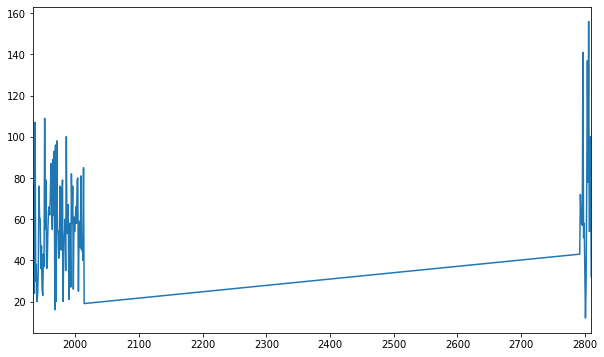

In [103]:
air2=airdata.copy()
air2['median'].iloc[:100].plot(figsize=(10,6))

In [92]:
#summarize each month
air3 = airdata.copy()
dates='2020-04-30' > air3['Date'], air3 > '2020-01-1'
air4=air3[dates]

air4['Date'] = pd.to_datetime(air4['Date'])
air4 = air4.set_index(['Date'])

hmm = air4['median'].resample('M').median()
hmm

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [79]:
#filter by city
cities = ["Santiago", "Wuhan", "Beijing", "Dheli", "Mumbai", "London", "Florence", "Hong Kong", "Milan", "Rome"]
airdata = airdata[airdata.City.isin(cities)]
airdata.head()


,Date,Country,City,Specie,count,min,max,median,variance
107750,2019-10-25,IN,Mumbai,pm25,104,5.0,146.0,60.0,4842.29
107751,2019-11-15,IN,Mumbai,pm25,115,91.0,182.0,158.0,3178.52
107752,2019-12-01,IN,Mumbai,pm25,113,88.0,215.0,175.0,4276.58
107753,2019-12-04,IN,Mumbai,pm25,312,55.0,834.0,135.0,61167.80
107754,2019-10-07,IN,Mumbai,pm25,119,67.0,168.0,123.0,6807.86


In [80]:
countries = ["GB", "IN", "CN", "CL", "IT", "HK"]
airdata = airdata[airdata.Country.isin(countries)]
airdata

,Date,Country,City,Specie,count,min,max,median,variance
107750,2019-10-25,IN,Mumbai,pm25,104,5.0,146.0,60.0,4842.29
107751,2019-11-15,IN,Mumbai,pm25,115,91.0,182.0,158.0,3178.52
107752,2019-12-01,IN,Mumbai,pm25,113,88.0,215.0,175.0,4276.58
107753,2019-12-04,IN,Mumbai,pm25,312,55.0,834.0,135.0,61167.80
107754,2019-10-07,IN,Mumbai,pm25,119,67.0,168.0,123.0,6807.86
...,...,...,...,...,...,...,...,...,...
669881,2020-03-30,HK,Hong Kong,pm25,328,4.0,80.0,52.0,1893.73
669882,2020-03-31,HK,Hong Kong,pm25,336,3.0,92.0,50.0,3068.29
669883,2020-01-14,HK,Hong Kong,pm25,330,23.0,122.0,74.0,2009.74
669884,2020-02-04,HK,Hong Kong,pm25,339,14.0,97.0,61.0,1727.94


In [82]:
airdata.to_csv("../Resources/airdata.csv")


#filter to just 2020
dates=airdata['Date'] > '2020-01-1'
airdata2=airdata[dates]

airdata2.to_csv("../Resources/airdata2.csv")